In [1]:
import numpy as np

In [2]:
X = np.random.rand(100, 1) * 2
y = 4 * X + 3.5 + np.random.rand(100, 1)

In [3]:
import matplotlib.pyplot as plt

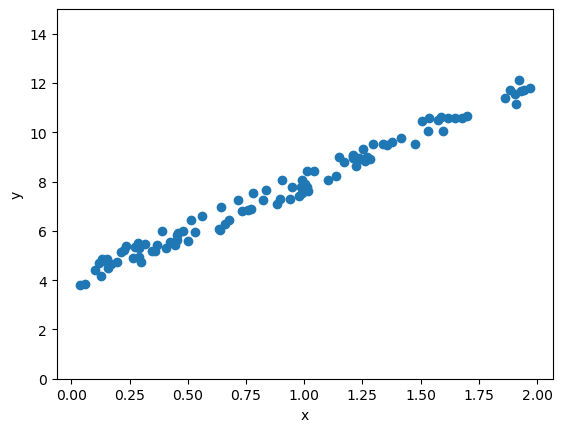

In [4]:
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 15)
plt.show()

In [5]:
#adding one to each instance
X_b = np.c_[np.ones((100, 1)), X] 

In [6]:
#using normal solution
solution = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
print(solution)

[[3.97638055]
 [4.01340291]]


In [8]:
#another way using matrix multiplication
np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

array([[3.97638055],
       [4.01340291]])

In [9]:
#using scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.97638055]
[[4.01340291]]


In [11]:
#LinearRegression using least square technieuq (that's using Normal equation)
import scipy
theta_best_svd, residual, rank, s = scipy.linalg.lstsq(X_b, y, cond = 1e-6)
print(theta_best_svd)

[[3.97638055]
 [4.01340291]]


In [12]:
#using pseudo inverse
np.linalg.pinv(X_b) @ y

array([[3.97638055],
       [4.01340291]])

In [13]:
#Gradient descent
eta = 0.1 #learning rate
n_iter = 1000
m = 100
rand_theta = np.random.rand(2, 1)
for i in range(n_iter):
    gradient = 2 / m * X_b.T @ (X_b @ rand_theta - y)
    rand_theta -= eta * gradient

print(rand_theta)

[[3.97638055]
 [4.01340291]]


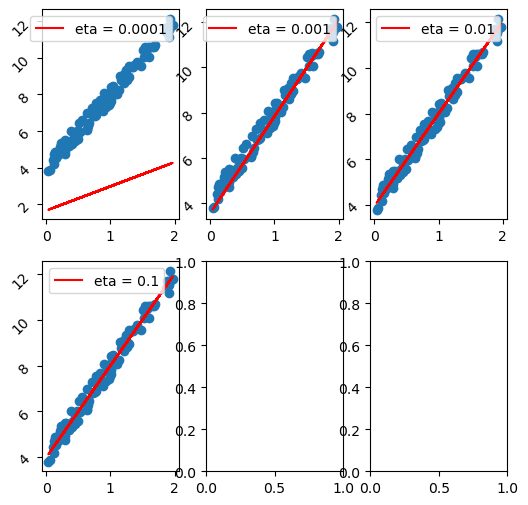

In [14]:
etas = [0.0001, 0.001, 0.01, 0.1]
n_iter = 1000
m = 100
fig, axes = plt.subplots(2, 3, figsize = (6, 6))
axes = axes.flatten()
for i, eta in enumerate(etas):
    rand_theta = np.random.rand(2, 1)
    for _ in range(n_iter):
        gradient = 2 / m * X_b.T @ (X_b @ rand_theta - y)
        rand_theta -= eta * gradient
    axes[i].scatter(X, y)
    axes[i].plot(X, X_b @ rand_theta, color = 'red', label = f'eta = {eta}')
    axes[i].legend()
    axes[i].tick_params(axis = 'y', rotation = 45)
plt.show()

In [15]:
#stochastic gradient
n_epochs = 50
eta = 0.1
def learning_schedule(t):
    return 5.0 / (t + 50.0)
theta = np.random.rand(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradient = 2 * (xi @ theta - yi) * xi.T
        theta -= eta * gradient
print(theta)

[[3.97244445]
 [3.85340195]]


In [16]:
# Stochastic using sklearn
#n_iter = 1000
#tolerance = e-3 means acceplt only parameters that offer cost smaller than e-3
#eta = .1
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = .1)
sgd_reg.fit(X_b, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.coef_

array([1.98673613, 3.99210915])

In [18]:
m = 100
X = 6 * np.random.rand(m, 1)  - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

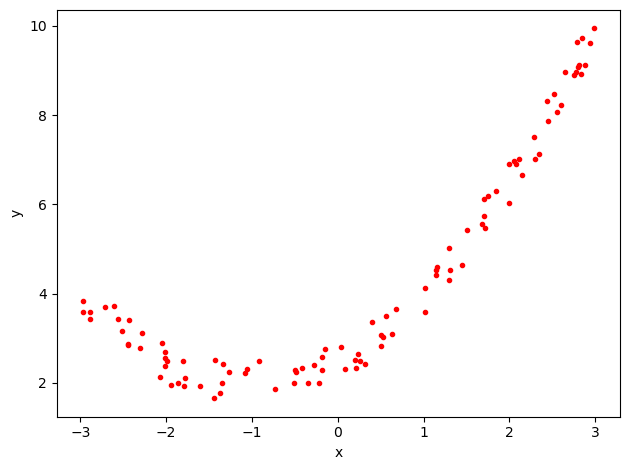

In [19]:
plt.scatter(X, y, marker = '.', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.71239427]
[1.71239427 2.93229414]


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.coef_)

[[1.00542162 0.492461  ]]


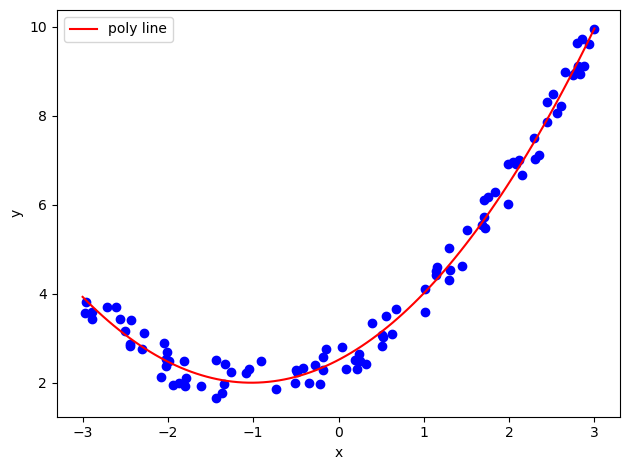

In [22]:
x_draw = np.linspace(-3, 3, 100).reshape(-1, 1)
x_draw = poly_features.fit_transform(x_draw)
y_pred = lin_reg.intercept_ + x_draw @ lin_reg.coef_.T
plt.scatter(X, y, color = 'blue')
plt.plot(np.linspace(-3, 3, 100).reshape(-1, 1), y_pred, color = 'red', label = 'poly line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
X = np.random.rand(100, 1) * 4 - 3
y = X ** 3 + 1.2 * X **2 + 0.3 * X + 2.1 + np.random.standard_normal(100).reshape(-1, 1)

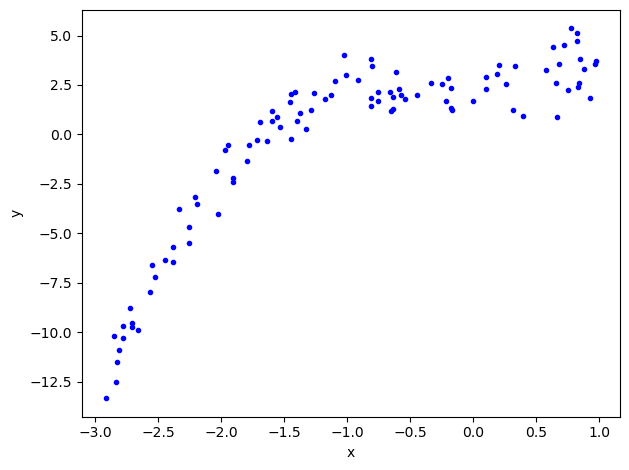

In [24]:
plt.scatter(X, y, color = 'blue', marker = '.')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

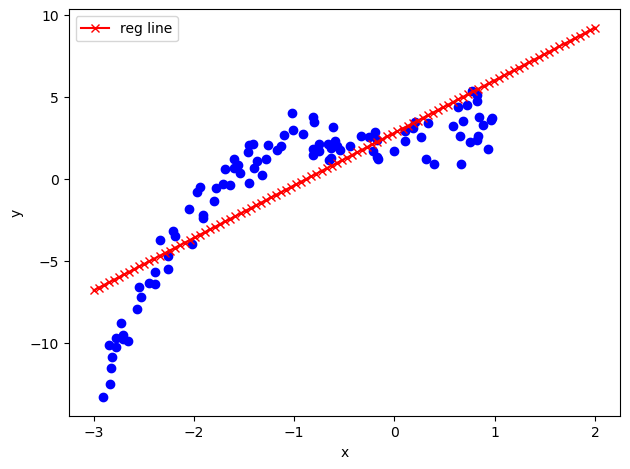

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
x_draw = np.linspace(-3, 2, 100).reshape(-1, 1)
y_draw = lin_reg.predict(x_draw)
plt.plot(x_draw, y_draw, marker = 'x', color = 'red', label = 'reg line')
plt.scatter(X, y, marker = 'o', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.pipeline import Pipeline

poly_pipe = Pipeline([('poly_transform', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('clf', LinearRegression())])
poly_pipe.fit(X, y)

Pipeline(steps=[('poly_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('clf', LinearRegression())])

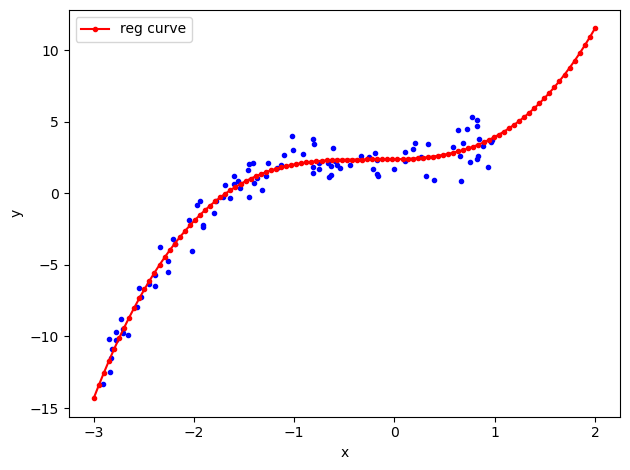

In [27]:
y_draw_pred = poly_pipe.predict(x_draw)
plt.scatter(X, y, color = 'blue', marker = '.')
plt.plot(x_draw, y_draw_pred, color = 'red', marker = '.', label = 'reg curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

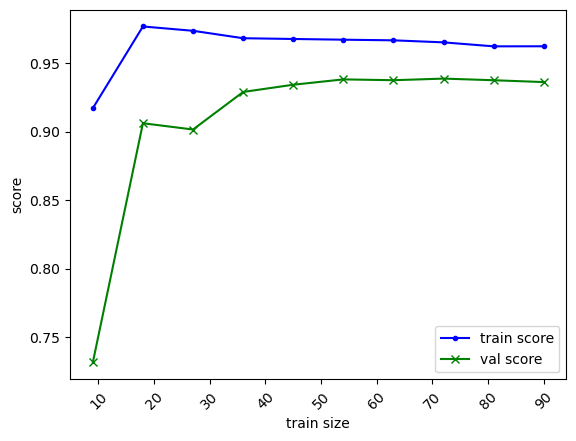

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(estimator = poly_pipe,
                                                       X = X, 
                                                       y = y,
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10,
                                                       n_jobs = 1)
train_scores = np.mean(train_scores, axis = 1)
val_scores = np.mean(val_scores, axis = 1)
plt.plot(train_sizes, train_scores, color = 'blue', label = 'train score', marker = '.')
plt.plot(train_sizes, val_scores, color = 'green', label = 'val score', marker = 'x')
plt.xlabel('train size')
plt.ylabel('score')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

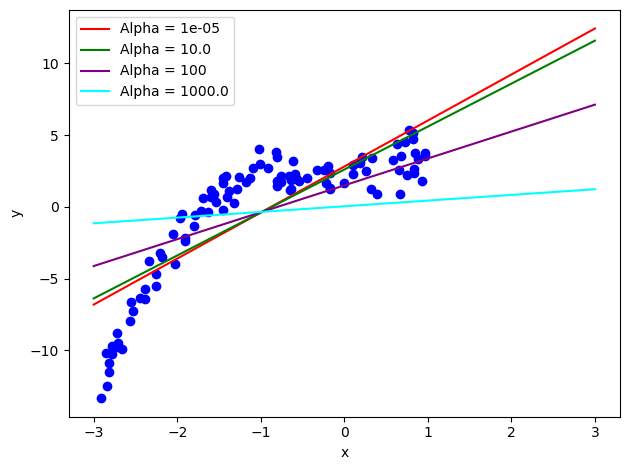

In [29]:
#using regularization parameter
from sklearn.linear_model import Ridge
alphas = [1e-5, 10.0, 100, 1000.0]
colors = ['red', 'green', 'purple', 'cyan']
plt.scatter(X, y, color = 'blue', marker = 'o')
for alpha, color in zip(alphas, colors):
    ridge = Ridge(alpha = alpha, solver = 'cholesky')
    ridge_red = ridge.fit(X, y)
    x_draw = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred_draw = ridge_red.predict(x_draw)
    plt.plot(x_draw, y_pred_draw, color = color, label = f'Alpha = {alpha}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
plt.show()

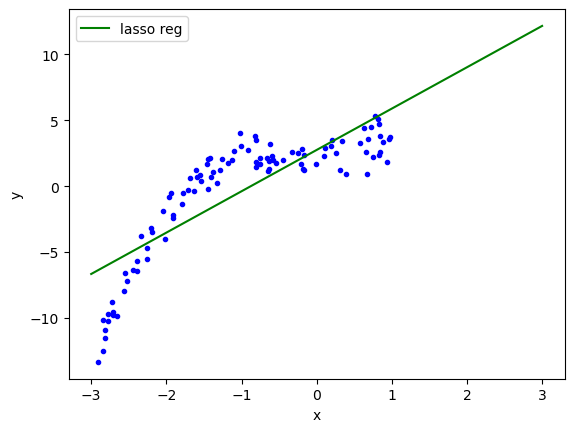

In [30]:
#lasso
from sklearn.linear_model import Lasso
las = Lasso(alpha = .1)
las.fit(X, y)
plt.scatter(X, y, marker = '.', color = 'blue')
x_draw = np.linspace(-3, 3, 10).reshape(-1, 1)
plt.plot(x_draw, las.predict(x_draw), color = 'green', label = 'lasso reg')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Elastic cost equation:**
$$
J(\theta) = \text{MSE}(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r} {2} \alpha \sum_{i=1}^{n} \theta_i^2
$$


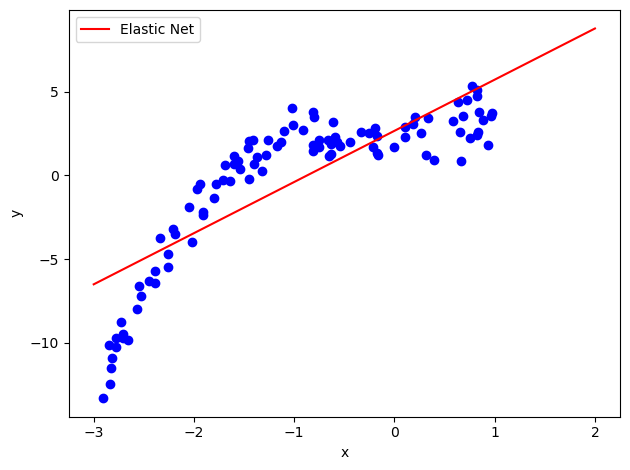

In [31]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
x_draw = np.linspace(-3, 2, 100).reshape(-1, 1)
y_draw_pred = elastic_net.predict(x_draw)
plt.scatter(X, y, color = 'blue', marker = 'o')
plt.plot(x_draw, y_draw_pred, color = 'red', label = 'Elastic Net')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
#Early Stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#prepare data
poly_scaler = Pipeline([('poly', PolynomialFeatures(degree = 90, include_bias = False)),
                    ('scaler', StandardScaler())])
X_train_poly_std = poly_scaler.fit_transform(X_train)
X_test_poly_std = poly_scaler.transform(X_test)
y_train = y_train.ravel()
y_test = y_test.ravel()
sgd_reg = SGDRegressor(max_iter = 1, tol = None, warm_start = True,
                       penalty = None, learning_rate = 'constant', eta0=0.0005)
minimum_test_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_std, y_train)
    y_test_pred = sgd_reg.predict(X_test_poly_std)
    test_error = mean_squared_error(y_test, y_test_pred)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
print(f'best epoch:{best_epoch}')
print(f'best model: {best_model}')

best epoch:810
best model: SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=None, warm_start=True)


In [47]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [51]:
print(iris['target_names'])
print(iris['feature_names'])


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [70]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [79]:
X_draw = np.linspace(0, 3, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_draw)
print(log_reg.classes_)
print(log_reg.intercept_)
print(log_reg.coef_)

[0 1]
[-7.19342106]
[[4.33251974]]


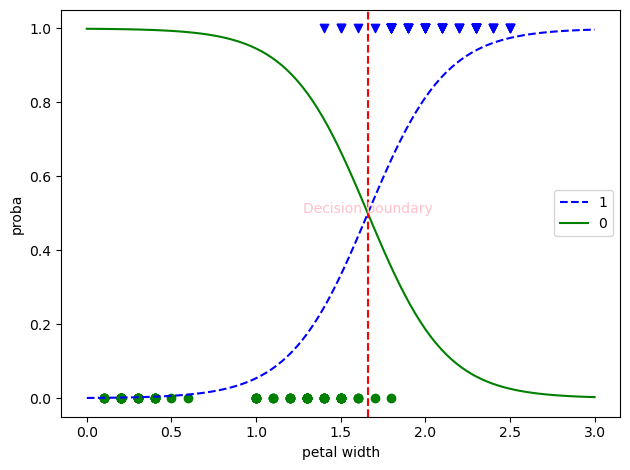

In [85]:
x_val = - log_reg.intercept_ / log_reg.coef_[0][0]
plt.plot(X_draw, y_proba[:, 1], color = 'blue', linestyle = 'dashed', label = '1')
plt.plot(X_draw, y_proba[:, 0], color = 'green', linestyle = 'solid', label = '0')
plt.scatter(X[y == 0], np.zeros(X[y==0].shape), marker = 'o', color = 'green')
plt.scatter(X[y == 1], np.ones(X[y ==1].shape), marker = 'v', color = 'blue')
plt.axvline(x = x_val, color = 'red', linestyle = '--')
plt.text(x_val, 0.5, 'Decision boundary', color = 'pink', horizontalalignment='center')
plt.xlabel('petal width')
plt.ylabel('proba')
plt.legend()
plt.tight_layout()
plt.show()

In [86]:
log_reg.predict([[1.7], [1.3]])

array([1, 0])

In [87]:
log_reg.predict_proba([[1.7], [1]])

array([[0.45713982, 0.54286018],
       [0.94587946, 0.05412054]])

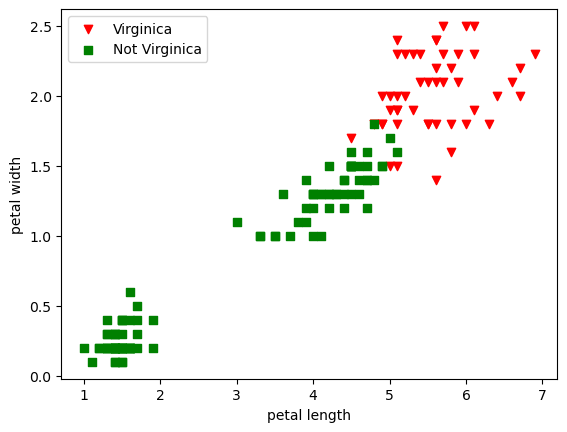

In [92]:
#for 2 features
X = iris['data'][:, [2, 3]]
y = (iris['target'] == 2).astype(int) # Virginica for 1, otherwise 0
#plot them
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'red', marker = 'v', label = 'Virginica')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'green', marker = 's', label = 'Not Virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

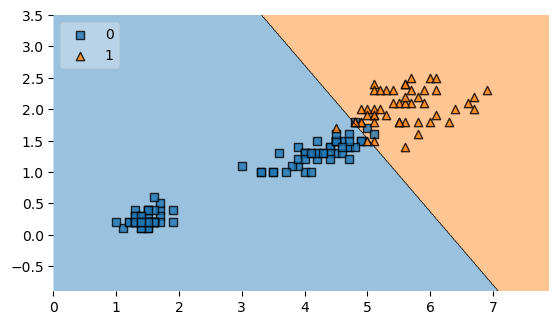

In [95]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf = log_reg, legend = 2)
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

In [101]:
#softmax regression
X = iris['data'][:, [2,3]]
y = iris['target']
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10.0)
softmax_reg.fit(X, y)

D:\ap\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10.0, multi_class='multinomial')

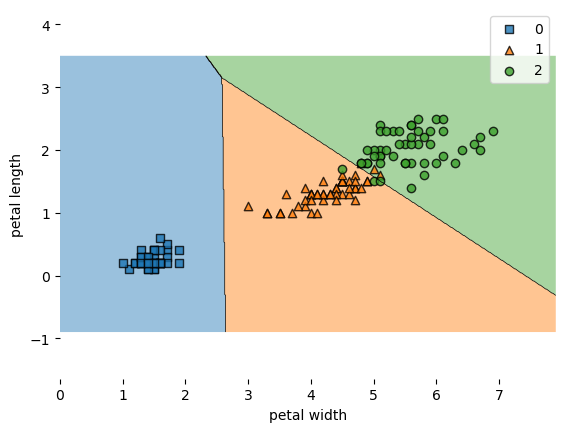

In [102]:
plot_decision_regions(X, y, clf = softmax_reg, legend = 3)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.axis('equal')
plt.legend()
plt.show()